# Point Cloud Alignment 

## Task 1 Opend 3D visualization

In [137]:
import sys
import mrob
import numpy as np
import open3d
import random 
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from math import sin, cos, atan2, pi
from IPython.display import display, Math, Latex, Markdown, HTML

In [100]:
# generate random data
N = 500
X =  np.random.rand(N,3)
T = mrob.geometry.SE3(np.random.rand(6))
Y = T.transform_array(X)+np.random.normal(loc = 0, scale = 0.05, size = (500,3))

Creat a function Vis(X, color) that plots a points X with the color using Open3d 

In [101]:
def vis (X, color = np.array([0,0,1], dtype='float64')): 


In [102]:
vis(X, np.array([0,0,1], dtype='float64'))

In [3]:
print('X = \n', X,'\n T = \n', T.T(),'\n Y =\n', Y)

X = 
 [[0.21757546 0.2150143  0.72423967]
 [0.39248146 0.53973956 0.85382586]
 [0.36286589 0.4394796  0.07897717]
 ...
 [0.34245966 0.32069244 0.13770791]
 [0.19657828 0.73683992 0.68700784]
 [0.28165774 0.14825462 0.4948161 ]] 
 T = 
 [[ 0.5503149  -0.19830434  0.81106652  0.71850786]
 [ 0.33616301  0.94180129  0.00217956  0.41457709]
 [-0.76429571  0.27145112  0.58494987  0.09667895]
 [ 0.          0.          0.          1.        ]] 
 Y =
 [[ 1.38301116  0.69179717  0.41239673]
 [ 1.51997313  1.05670322  0.44266529]
 [ 0.89510339  0.95063377 -0.01516298]
 ...
 [ 0.95506409  0.83202806  0.00254305]
 [ 1.23777832  1.1761136   0.54831618]
 [ 1.24543755  0.64996488  0.21109564]]


## Task 2 point cloud Alignment using Arun's Method. 


In [103]:

def pcd_1(X, color, T = np.identity(4)):
    pcd = open3d.geometry.PointCloud()
    pcd.points = open3d.utility.Vector3dVector(X)
    pcd.transform(T)
    pcd.paint_uniform_color(color)
    return pcd

In [104]:
def vis_her(X, Y, T = np.identity(4)):
    blue = np.array([0,0,1], dtype='float64')
    red = np.array([1,0,0], dtype='float64')
    open3d.visualization.draw_geometries([pcd_1(X,red), pcd_1(Y,blue, T)])

In [115]:
def apply_t (X, T):
    pcd = open3d.geometry.PointCloud()
    pcd.points = open3d.utility.Vector3dVector(X)
    pcd.transform(T)
    new_X = np.array(pcd.points)
    return new_X 
    

###  TODO: 
-use the function mrob.registration.arun() on the two point clouds. 

-Plot the two point clouds befor and after the solution. 

In [105]:
# solve the problem
# TODO: 
#* use the function mrob.registration.arun() on the two point clouds. 
#* Plot the two point clouds befor and after the solution. 


print('Arun solution =\n', T_arun.T())

Arun solution =
 [[ 0.95495196 -0.22811646  0.18981474  0.05038191]
 [ 0.27184906  0.92896223 -0.2512514   0.72772382]
 [-0.11901614  0.29153397  0.94912755  0.6824808 ]
 [ 0.          0.          0.          1.        ]]


### TODO: 
- Calculate the Rotation Distance and Translation Distance of arun't method output and ground truth. 

In [107]:
# Claculate the error: 
# TODO: 
#* Calculate the Rotation Distance and Translation Distance of arun't method output and ground truth. 
print('Rotation Distance: ',) 
print('Translation Distance: ',) 

Rotation Distance:  0.010095257067258485
Translation Distance:  0.006315785691244644


# ICP:


In [120]:
# Genrate data: 
angle = pi / 8
R_true = np.array([[cos(angle), -sin(angle), 0], 
                   [sin(angle),  cos(angle), 0],
                   [0, 0, 1]])
t_true = np.array([[-2], [5], [0]])
num_points = 30
true_data = np.zeros((3, num_points))
true_data[0, :] = range(0, num_points)
true_data[1, :] = 0.2 * true_data[0, :] * np.sin(0.5 * true_data[0, :]) 
transformed_data = R_true.dot(true_data) + t_true

Q = true_data.T
P = transformed_data.T
vis_her(Q, P)


## Task 1: 

### Calculate correspondence

In [35]:
def get_correspondence_indices(P, Q):
    """TODO 
    #*For each point in P find closest one in Q."""

    return correspondences

In [121]:
correspondences = get_correspondence_indices(P, Q)
correspondences 

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 2),
 (4, 3),
 (5, 3),
 (6, 4),
 (7, 4),
 (8, 5),
 (9, 5),
 (10, 5),
 (11, 14),
 (12, 15),
 (13, 15),
 (14, 15),
 (15, 15),
 (16, 15),
 (17, 16),
 (18, 16),
 (19, 16),
 (20, 16),
 (21, 16),
 (22, 17),
 (23, 17),
 (24, 28),
 (25, 28),
 (26, 28),
 (27, 28),
 (28, 28),
 (29, 28)]

In [60]:
def draw_correspondeces(P, Q, correspondences, ax):
    label_added = False
    for i, j in correspondences:
        x = [P[i, 0], Q[j, 0]]
        y = [P[i, 1], Q[j, 1]]
        z = [P[i, 2], Q[j, 2]]
        if not label_added:
            ax.plot(x, y,z, color='grey', label='correpondences')
            label_added = True
        else:
            ax.plot(x, y, z,color='grey')
    ax.legend()

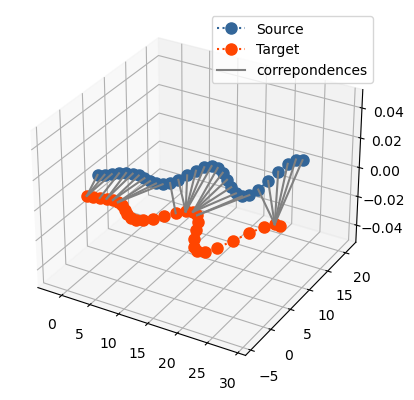

In [122]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(P[:,0], P[:,1], P[:,2],color='#336699', markersize=8, marker='o', linestyle=":", label = 'Source')
ax.plot(Q[:,0], Q[:,1], Q[:,2],color='orangered', markersize=8, marker='o', linestyle=":", label = 'Target')
draw_correspondeces(P, Q, correspondences, ax)
plt.show()


### Use the Arun's method to calculat first correction of ICP: 

Arun solution =
 [[ 0.99424538  0.10712671  0.          0.90844785]
 [-0.10712671  0.99424538  0.         -0.80778366]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


## Let's Make it iterative: 